# **Movie Success Prediction**


# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Read Dataset: .csv/.xlsx to DataFrame**

In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/imdb_movies.csv")

# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [ ]:
print(f'The shape of the dataset is {dataset.shape}')

The shape of the dataset is (10178, 12)


In [ ]:
columns = dataset.columns.tolist()
print(f'Number of features:{len(columns)}')

Number of features:12


In [ ]:
print('The features are:')
for i in columns:
  print(i)

The features are:
names
date_x
score
genre
overview
crew
orig_title
status
orig_lang
budget_x
revenue
country


In [ ]:
dataset.head(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
dataset.sample(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
2829,We Were Soldiers,04/25/2002,71.0,"Action, History, War",The story of the first major battle of the Ame...,"Mel Gibson, Lt. Col. Hal Moore, Greg Kinnear, ...",We Were Soldiers,Released,English,70000000.0,114658262.0,AU
5372,The Specialist,02/26/1995,59.0,"Action, Thriller",May Munro is a woman obsessed with getting rev...,"Sylvester Stallone, Ray Quick, Sharon Stone, M...",The Specialist,Released,English,45000000.0,170362581.0,AU
5094,Giving Hope: The Ni'cola Mitchell Story,04/09/2023,0.0,"Drama, Crime, TV Movie","The story of Ni'cola Mitchell, a victim of uns...","Tatyana Ali, Ni'cola Mitchell, Kudakwashe Rute...",Giving Hope: The Ni'cola Mitchell Story,Released,English,199600000.0,175269998.8,US
485,Inception,07/22/2010,84.0,"Action, Science Fiction, Adventure","Cobb, a skilled thief who commits corporate es...","Leonardo DiCaprio, Dom Cobb, Joseph Gordon-Lev...",Inception,Released,English,160000000.0,728537960.0,AU
5743,Detachment,04/24/2011,76.0,Drama,A chronicle of three weeks in the lives of sev...,"Adrien Brody, Henry Barthes, Sami Gayle, Erica...",Detachment,Released,English,5389600.0,1681521.0,AU


In [ ]:
dataset.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [ ]:
for column in dataset.columns:
    dtype = dataset[column].dtype
    unique_values = dataset[column].nunique()

    if dtype == 'object' or unique_values < 10:
        print(f"Column '{column}' is a categorical feature.")

Column 'names' is a categorical feature.
Column 'date_x' is a categorical feature.
Column 'genre' is a categorical feature.
Column 'overview' is a categorical feature.
Column 'crew' is a categorical feature.
Column 'orig_title' is a categorical feature.
Column 'status' is a categorical feature.
Column 'orig_lang' is a categorical feature.
Column 'country' is a categorical feature.


In [ ]:
#Editing dataset
column_to_make_null1 = 'overview'
column_to_make_null2= 'orig_title'
column_to_make_null3 = 'status'

dataset[column_to_make_null1] = None
dataset[column_to_make_null2] = None
dataset[column_to_make_null3] = None

dataset['date_x'] = pd.to_datetime(dataset['date_x'])
dataset['month'] = dataset['date_x'].dt.month

In [ ]:
#editing and encoding the label
dataset.loc[dataset['score'] < 50, 'score'] = 0
dataset.loc[dataset['score'] >= 50, 'score'] = 1

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    0 non-null      object        
 5   crew        10122 non-null  object        
 6   orig_title  0 non-null      object        
 7   status      0 non-null      object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
 12  month       10178 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 994.1+ KB


# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

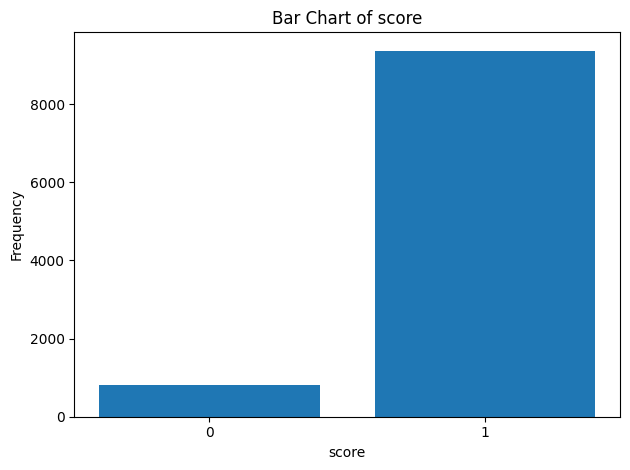

In [ ]:
column_to_plot = 'score'
value_counts = dataset[column_to_plot].value_counts()

# Create a bar chart with explicit x ticks for 0 and 1
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Bar Chart of {column_to_plot}')
plt.xticks(value_counts.index)  # Set x ticks to be the values (0 and 1)
plt.tight_layout()
plt.show()


In [ ]:
print('Not balanced as the class 1 has been priorotized')

Not balanced as the class 1 has been priorotized


***Feature Selection***






In [ ]:
corr_matrix = dataset[['score','budget_x','revenue','month']].corr()

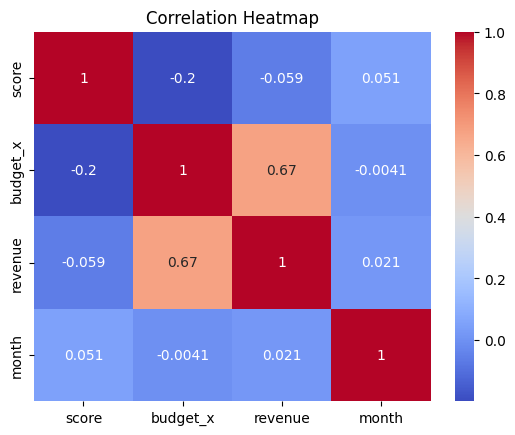

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print('Dropping the Unneccssary columns')

Dropping the Unneccssary columns


In [ ]:
columns_to_drop = ['names', 'date_x','orig_title']
df_dropped = dataset.drop(columns=columns_to_drop,inplace = True)

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

In [ ]:
dataset.isnull().sum()

score            0
genre           85
overview     10178
crew            56
status       10178
orig_lang        0
budget_x         0
revenue          0
country          0
month            0
dtype: int64

In [ ]:
#dropping rows
print('Dropping The rows of column with null values')
dataset.dropna(subset=["crew"],inplace = True,axis =0)

Dropping The rows of column with null values


In [ ]:
#dropping columns
print('Dropping The columns with null values')
columns_to_drop = ['overview', 'status']
df_dropped = dataset.drop(columns=columns_to_drop,inplace = True)

Dropping The columns with null values


In [ ]:
#imputing values
print('Imputing the values of Genre with the most frequent value')
most_frequent_value = dataset['genre'].mode()[0]

print("Most frequent value:", most_frequent_value)
from sklearn.impute import SimpleImputer

constant_value = most_frequent_value
imputer = SimpleImputer(strategy='constant', fill_value=constant_value)


dataset[["genre"]] = imputer.fit_transform(dataset[["genre"]])

Imputing the values of Genre with the most frequent value
Most frequent value: Drama


In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
print('Encoding The Categorical Feature Country Using Label Encoding')
le = LabelEncoder()
dataset['country_encoded'] = le.fit_transform(dataset['country'])

Encoding The Categorical Feature Country Using Label Encoding


In [ ]:
print('Encoding the categorical feature genre Using one hot encoding')
dataset['genre'] = dataset['genre'].str.split(',')

unique_values = set(value for sublist in dataset['genre'] for value in sublist)



for value in unique_values:
    dataset[value] = dataset['genre'].apply(lambda x: 1 if value in x else 0)

Encoding the categorical feature genre Using one hot encoding


In [ ]:
print('Encoding the categorical feature orig_lang Using one hot encoding')
dataset['orig_lang'] = dataset['orig_lang'].str.split(',')

unique_values = set(value for sublist in dataset['orig_lang'] for value in sublist)

new_columns = []

for value in unique_values:
    new_column = dataset['orig_lang'].apply(lambda x: 1 if value in x else 0)
    new_columns.append(new_column)

dataset = pd.concat([dataset] + new_columns, axis=1)


Encoding the categorical feature orig_lang Using one hot encoding


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10122 entries, 0 to 10177
Columns: 105 entries, score to orig_lang
dtypes: float64(3), int32(1), int64(97), object(4)
memory usage: 8.1+ MB


In [ ]:
#dropping columns after preprocessing
columns_to_drop = ['genre', 'orig_lang','country','crew']
df_dropped = dataset.drop(columns=columns_to_drop,inplace = True)

# **Dataset Splitting**

- Training Set

- Testing Set

In [ ]:
#x and y definition
target_column = 'score'
feature_columns = [col for col in dataset.columns if col != target_column]
Y = dataset[target_column]
X= dataset[feature_columns]

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the dataset
x, y = smote.fit_resample(X, Y)


In [ ]:
#shape after data balancing
x.shape, y.shape

((18672, 42), (18672,))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#shape of traing and testing data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (14937, 42)
Test data shape: (3735, 42)
Training labels shape: (14937,)
Test labels shape: (3735,)


In [ ]:
#dataset scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)
X_train_scaled=scaler.transform(x_train)
X_test_scaled=scaler.transform(x_test)

# **Dataset Training**

Classification Problem

- SVM

- Decision Tree

- K-nearest Neighbors

- Logistic Regression


***Classification Problem***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#svm
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8942436412315931
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      1911
         1.0       0.85      0.95      0.90      1824

    accuracy                           0.89      3735
   macro avg       0.90      0.90      0.89      3735
weighted avg       0.90      0.89      0.89      3735



In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1911
         1.0       0.96      0.92      0.94      1824

    accuracy                           0.94      3735
   macro avg       0.94      0.94      0.94      3735
weighted avg       0.94      0.94      0.94      3735



In [ ]:
#kth nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1911
         1.0       0.95      0.86      0.90      1824

    accuracy                           0.91      3735
   macro avg       0.91      0.91      0.91      3735
weighted avg       0.91      0.91      0.91      3735



In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8955823293172691
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      1911
         1.0       0.87      0.93      0.90      1824

    accuracy                           0.90      3735
   macro avg       0.90      0.90      0.90      3735
weighted avg       0.90      0.90      0.90      3735



# **Result analysis of used models**




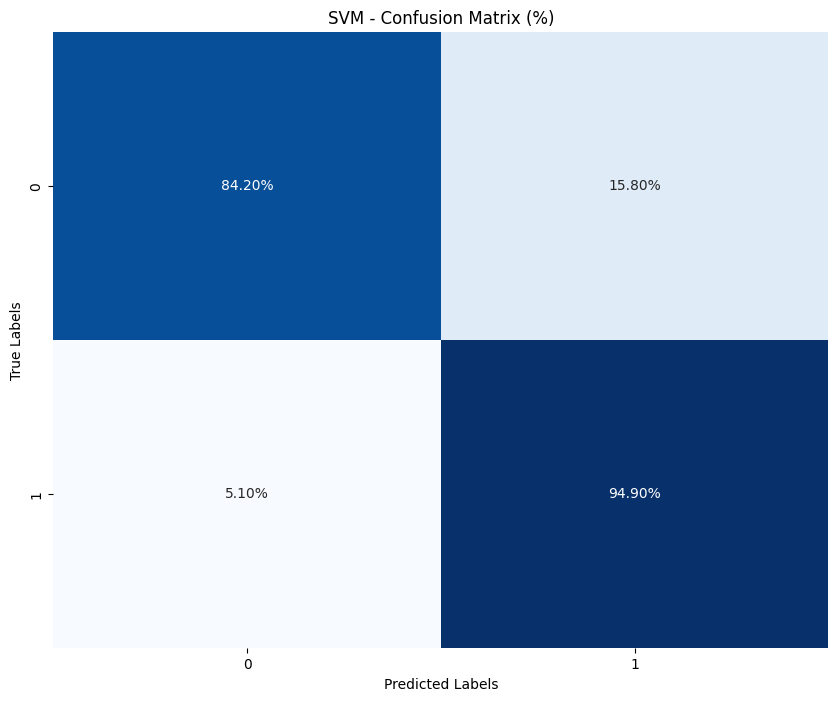

In [ ]:
#svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt=".2%", cbar=False)
plt.title("SVM - Confusion Matrix (%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


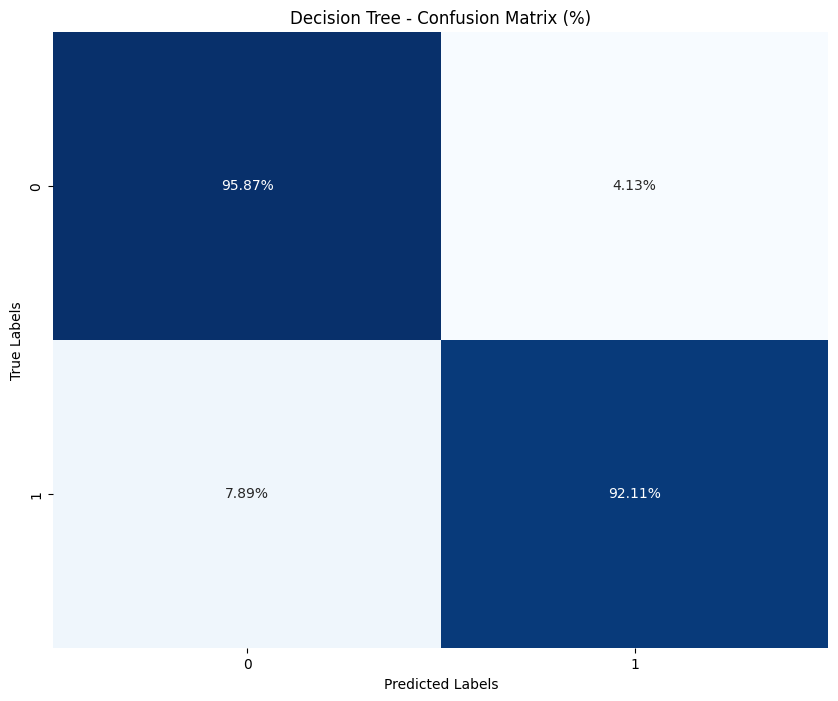

In [ ]:
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_scaled, y_train)
y_pred = decision_tree_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt=".2%", cbar=False)
plt.title("Decision Tree - Confusion Matrix (%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


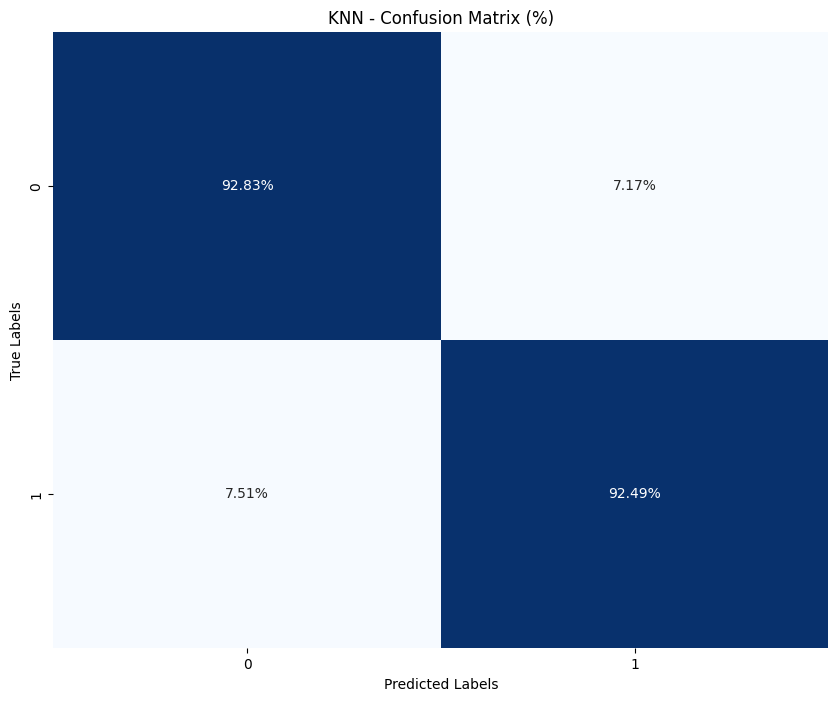

In [ ]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt=".2%", cbar=False)
plt.title("KNN - Confusion Matrix (%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


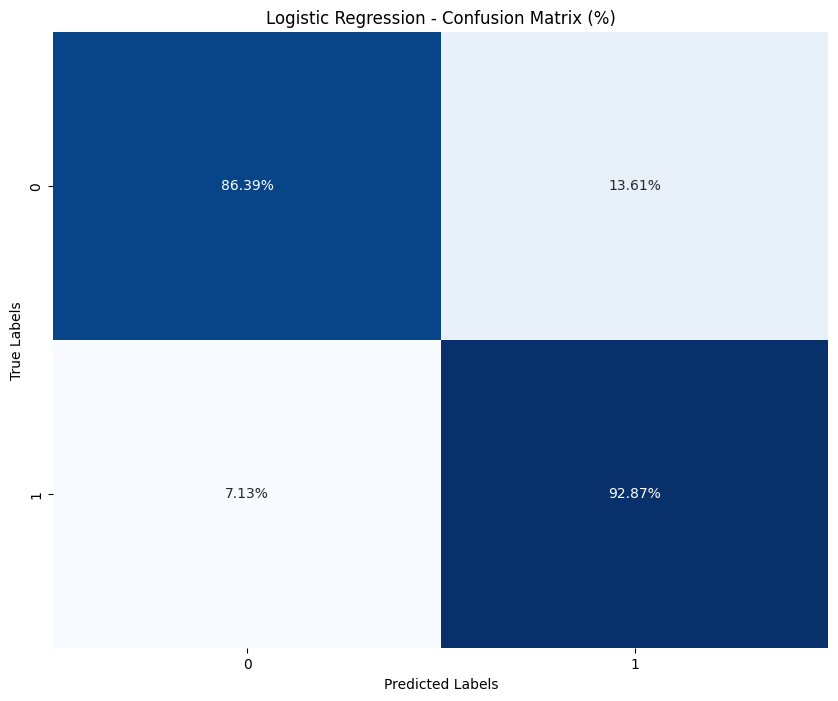

In [ ]:
#logistic regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, cmap='Blues', fmt=".2%", cbar=False)
plt.title("Logistic Regression - Confusion Matrix (%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


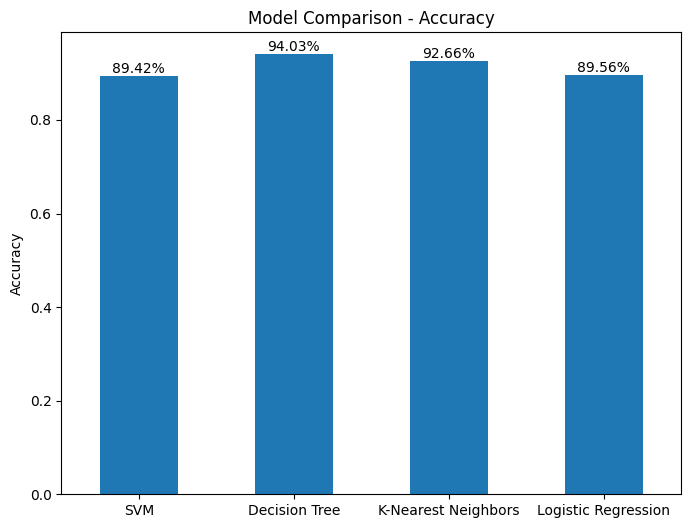

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

svm_classifier = SVC(kernel='linear', random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
logreg_classifier = LogisticRegression()

svm_classifier.fit(X_train_scaled, y_train)
decision_tree_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
logreg_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

models = ['SVM', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
accuracy_scores = [svm_accuracy, decision_tree_accuracy, knn_accuracy, logreg_accuracy]

accuracy_df = pd.DataFrame(accuracy_scores, columns=['Accuracy'], index=models)

ax = accuracy_df.plot(kind='bar', figsize=(8, 6))
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.get_legend().remove()

plt.show()


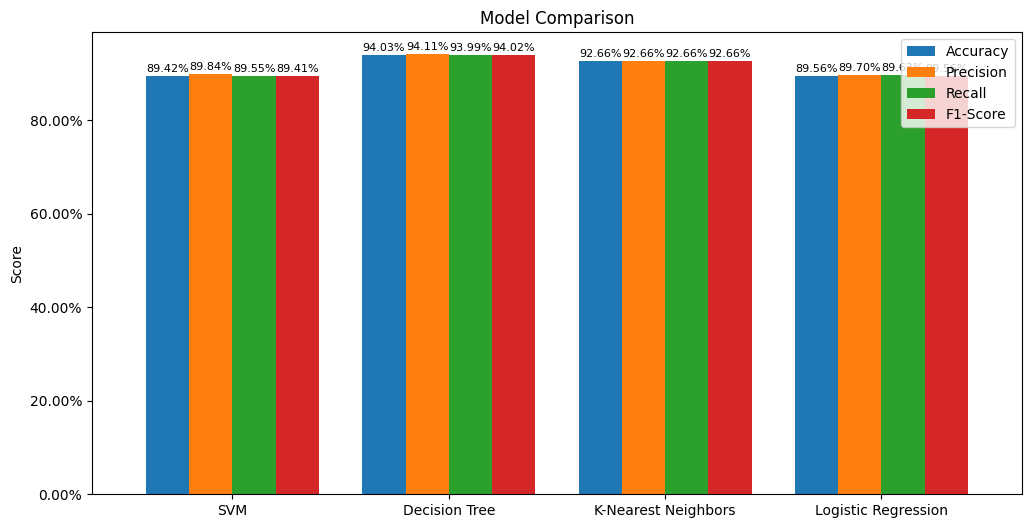

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

svm_classifier = SVC(kernel='linear', random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
logreg_classifier = LogisticRegression()

svm_classifier.fit(X_train_scaled, y_train)
decision_tree_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
logreg_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

svm_metrics = [accuracy_score(y_test, y_pred_svm),
               precision_score(y_test, y_pred_svm, average='macro'),
               recall_score(y_test, y_pred_svm, average='macro'),
               f1_score(y_test, y_pred_svm, average='macro')]

decision_tree_metrics = [accuracy_score(y_test, y_pred_decision_tree),
                         precision_score(y_test, y_pred_decision_tree, average='macro'),
                         recall_score(y_test, y_pred_decision_tree, average='macro'),
                         f1_score(y_test, y_pred_decision_tree, average='macro')]

knn_metrics = [accuracy_score(y_test, y_pred_knn),
               precision_score(y_test, y_pred_knn, average='macro'),
               recall_score(y_test, y_pred_knn, average='macro'),
               f1_score(y_test, y_pred_knn, average='macro')]

logreg_metrics = [accuracy_score(y_test, y_pred_logreg),
                  precision_score(y_test, y_pred_logreg, average='macro'),
                  recall_score(y_test, y_pred_logreg, average='macro'),
                  f1_score(y_test, y_pred_logreg, average='macro')]

models = ['SVM', 'Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
data = [svm_metrics, decision_tree_metrics, knn_metrics, logreg_metrics]

metrics_df = pd.DataFrame(data, columns=metrics, index=models)

ax = metrics_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=2))

plt.show()


# **Summary of your project**

Initially, a thorough analysis of the dataset was conducted, during which certain modifications were made. A new column named "month" was extracted from the "date_x" column, solely containing the month information. Subsequently, the target variable, labeled as 'score', underwent encoding into 2 distinct values: 0 for scores ranging from 0 to 50, representing 'bad'; 1 for scores between 50 and 100, signifying 'good'. Moving forward, a bar chart was constructed to demonstrate the class distribution, revealing an imbalance in the classes and thereby indicating a biased dataset. Continuing with the analysis, a correlation heatmap was generated to visually interpret the relationships between features and labels. This heatmap served to identify which features had the most substantial influence on the respective labels or classes. To streamline the dataset, irrelevant columns such as 'names', 'date_x', and 'orig_title' were dropped, as they would not be utilized in the subsequent steps involving encoding or modeling. Transitioning into the preprocessing phase, attention was directed to handling missing values. Rows containing 56 null values in the "crew" column were removed. Additionally, rows with complete null values in columns such as 'overview', 'orig_title', and 'status' were dropped. Addressing the 85 null values in the "genre" column, the missing values were imputed with the most frequently occurring value. The "country," "genre," and "orig_lang" features underwent encoding using label encoding and ond hot encoding techniques. Following this, the dataset was divided into features and labels, and a balanced dataset was created through random sampling to address class imbalance. This balanced data was then split into training and testing sets, after which feature scaling was applied. Subsequently, four different classification models—SVM, Decision Tree, k-Nearest Neighbors, and Logistic Regression—were trained on the prepared data. Predictions were made using the test data for each model. Finally, a comprehensive comparison of model performances was carried out, evaluating their effectiveness in predicting the target label.